## Notebook to NMF features

In [1]:
import os
import sys
parent_dr = os.path.split(os.getcwd())[0]
if parent_dr not in sys.path:
    sys.path.append(parent_dr)

In [3]:
from sklearn.decomposition import NMF
from core.data.training_data import *
from core.matrix.nmf_decompositions import compute_nmf, generate_topics_from_NMF, plot_top_words_with_weights_nmf

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [6]:
# path to serialized training data
file_name = "tokenized_arxiv_subset_15540.pkl"
full_path = os.path.join(parent_dr, "core", "resources", file_name)

# wrapper for training data and computed matrices
data_obj = TrainingData(full_path)

## SVD Features

In [7]:
# VT_file_name = "tfidf_train_full_svd_V_T.pkl"
# VT_file_path = os.path.join(parent_dr, "core", "resources", VT_file_name)
# VT = np.load(VT_file_path, allow_pickle=True)
# print(f'V_T_from_pkl has dimensions:{VT.shape}')

In [8]:
# plot here

## NMF Topics

In [9]:
model_7, W_7, H_7 = compute_nmf(k=7, A=data_obj.tfidf_train_matrix)

In [10]:
topic_terms_7 = generate_topics_from_NMF(model_7.components_,
                                         data_obj.index_to_word,
                                         top_n_words = 10)

In [11]:
topic_terms_7

,Topic,Terms
0,0,"[problem, algorithm, search, solution, constraint, solve, method, heuristic, planning, approach]"
1,1,"[number, study, proceeding, conference, time, result, hold, covid, bind, et]"
2,2,"[datum, system, technology, student, ai, research, user, information, service, social]"
3,3,"[network, brain, neuron, model, neural, spike, activity, dynamic, stimulus, input]"
4,4,"[agent, game, learn, learning, environment, reinforcement, action, task, human, reward]"
5,5,"[graph, vertex, edge, free, tree, class, problem, polynomial, coloring, set]"
6,6,"[belief, logic, probability, knowledge, rule, model, theory, reasoning, set, inference]"


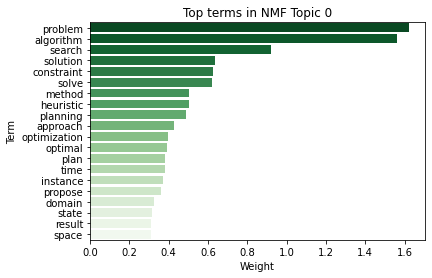

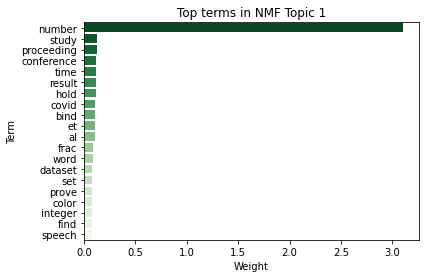

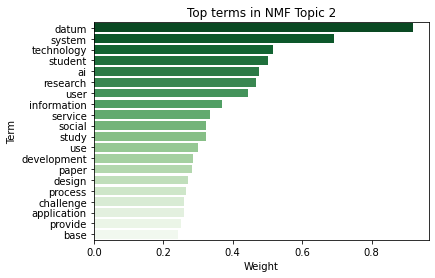

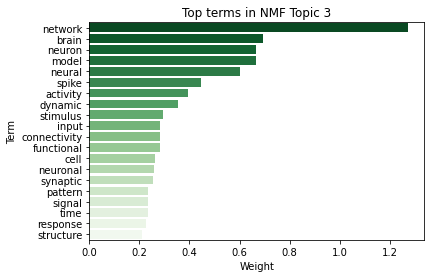

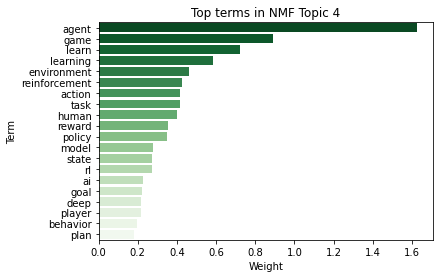

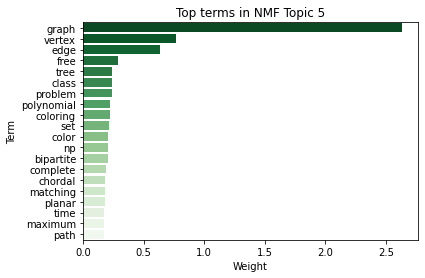

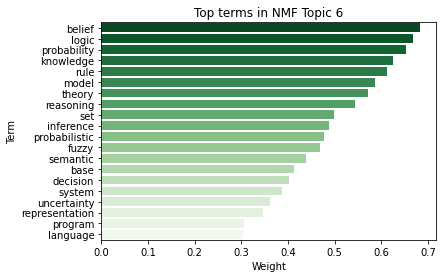

In [16]:
top_words = 20
sequential_colors = sns.color_palette("Greens", top_words)
sequential_colors.reverse()
sns.set_palette(sequential_colors)
plot_top_words_with_weights_nmf(H_7, data_obj.index_to_word, top_words=top_words)